In [141]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
from modules import *
from simyt import *


In [143]:
# choose simulation
sim_round = 8
sim_name = "bturbfunc"
sim_dir = move_to_sim_dir(sim_round, sim_name)
print()

dump = get_dump(a_exp=0.1)
info = get_info(dump)

print("Dump: %d" % dump)
print("a_exp: %.3g" % info.a_exp)
print("Maximum AMR level: %d" % info.amr_level_max)


Moving to directory '/home/za9132/scratch/romain/round8/bturbfunc'.

Dump: 13
a_exp: 0.0667
Maximum AMR level: 13


In [144]:
use_cubic = False
use_override = False

halo_cat = get_halo_cat(dump, cgs=True)
biggest_halo_idx = np.argmax(halo_cat.mass)
biggest_halo_coord_mass = halo_cat.coord[:, biggest_halo_idx]
biggest_halo_coord_cubic = get_biggest_halo_coord_cubic(info.a_exp) * info.length_unit
biggest_halo_coord_override = np.array([0.51053163, 0.51277185, 0.49297882]) * info.length_unit

print("Halo coord (mass): (%.5g, %.5g, %.5g)" % tuple(biggest_halo_coord_mass / info.length_unit))
print("Halo coord (cubic): (%.5g, %.5g, %.5g)" % tuple(biggest_halo_coord_cubic / info.length_unit))

if use_override: 
    biggest_halo_coord = biggest_halo_coord_override
elif use_cubic:
    biggest_halo_coord = biggest_halo_coord_cubic
else:
    biggest_halo_coord = biggest_halo_coord_mass
    
biggest_halo_coord_code = biggest_halo_coord / info.length_unit


Halo coord (mass): (0.50775, 0.50901, 0.49564)
Halo coord (cubic): (0.50774, 0.50905, 0.49567)


In [161]:
sim = SimYT(sim_round, sim_name, dump, biggest_halo_coord)


Moving to directory '/home/za9132/scratch/romain/round8/bturbfunc'.


yt : [INFO     ] 2023-12-15 17:08:59,595 Parameters: current_time              = 4.903841879057198
yt : [INFO     ] 2023-12-15 17:08:59,596 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-12-15 17:08:59,596 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-12-15 17:08:59,597 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-12-15 17:08:59,597 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-12-15 17:08:59,598 Parameters: current_redshift          = 13.993719531996112
yt : [INFO     ] 2023-12-15 17:08:59,598 Parameters: omega_lambda              = 0.723999977111816
yt : [INFO     ] 2023-12-15 17:08:59,598 Parameters: omega_matter              = 0.275999993085861
yt : [INFO     ] 2023-12-15 17:08:59,598 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-12-15 17:08:59,598 Parameters: hubble_constant           = 0.703000030517578
yt : [WARNING  ] 2023-12-15 17:09:11,015 The DM particle 

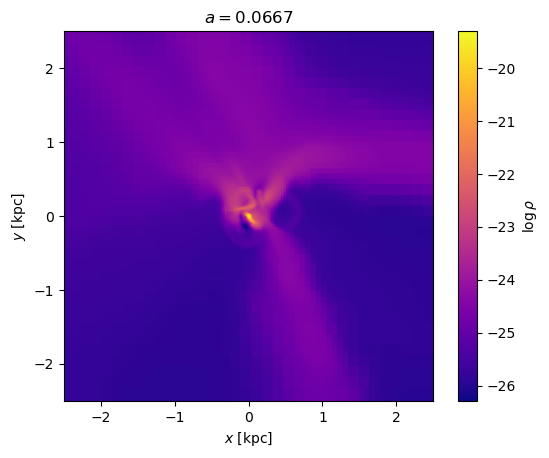

In [164]:
sim.slice('density', box_size=(5*const.kpc), do_log=True, label=r'$\log \rho$', cmap='plasma')


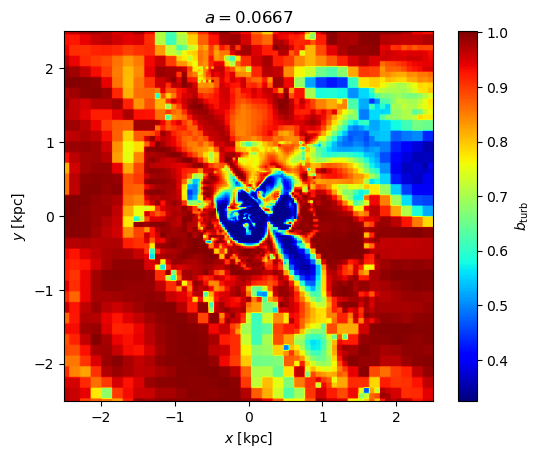

In [169]:
sim.slice('hydro_scalar_03', box_size=(5*const.kpc), label=r'$b_{\rm turb}$', cmap='jet')
